In [13]:
#visualizations_and_storytelling.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Load cleaned data
df = pd.read_csv('../outputs/cleaned_data.csv')
df.head()


,label,message,label_num,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


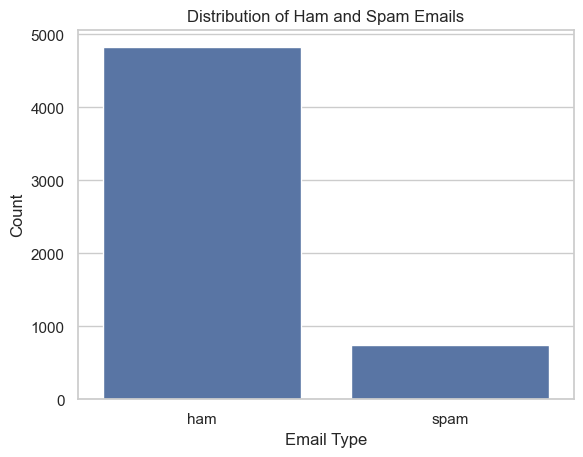

In [14]:
sns.set(style='whitegrid')

sns.countplot(x='label', data=df)

plt.title("Distribution of Ham and Spam Emails")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()



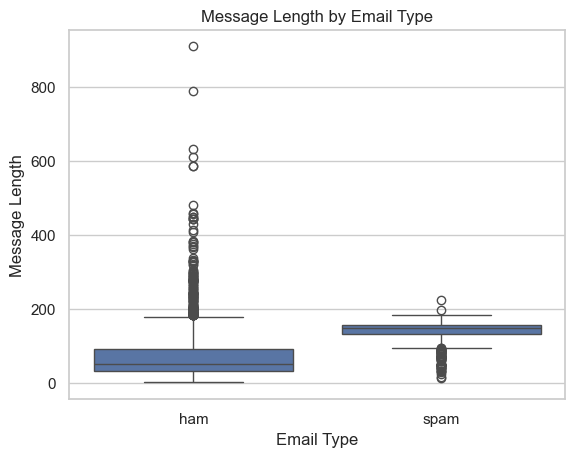

In [15]:
sns.boxplot(data=df, x='label', y='message_length')
plt.title("Message Length by Email Type")
plt.xlabel("Email Type")
plt.ylabel("Message Length")
plt.show()



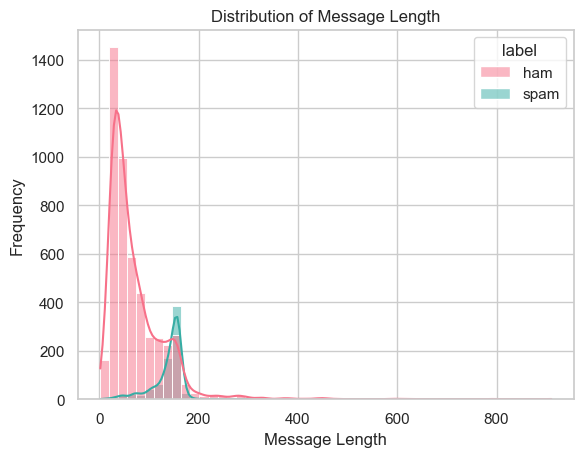

In [16]:
sns.histplot(data=df, x='message_length', bins=50, kde=True, hue='label', palette='husl')
plt.title("Distribution of Message Length")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()


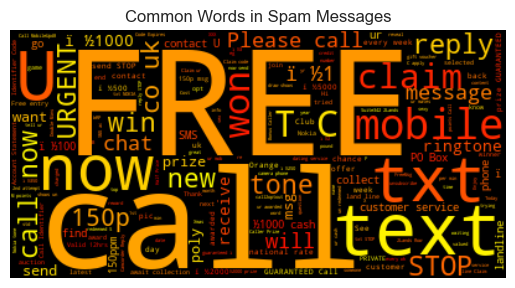

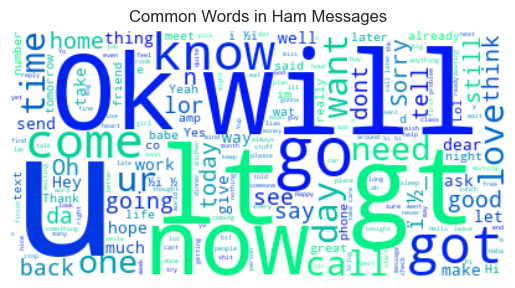

In [17]:
from wordcloud import WordCloud

# Spam WordCloud
spam_words = ' '.join(df[df.label == 'spam']['message'])
wc = WordCloud(background_color='black', max_words=200, colormap='autumn').generate(spam_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Spam Messages")
plt.show()

# Ham WordCloud
ham_words = ' '.join(df[df.label == 'ham']['message'])
wc = WordCloud(background_color='white', max_words=200, colormap='winter').generate(ham_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Ham Messages")
plt.show()


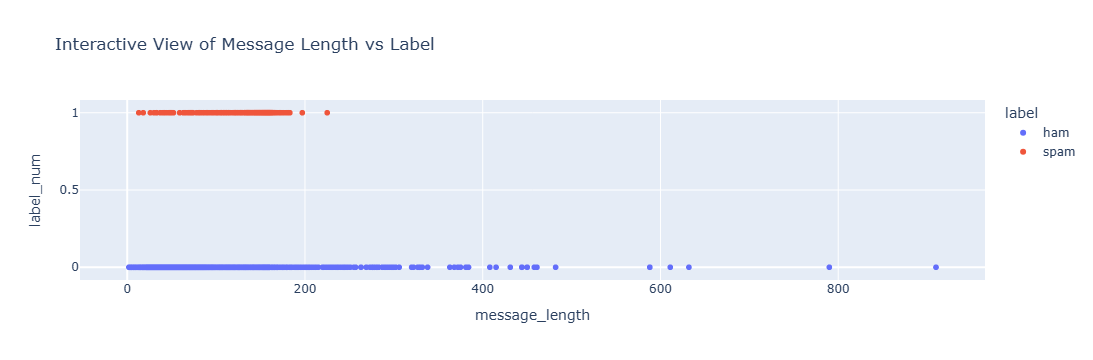

In [18]:
import plotly.express as px

fig = px.scatter(
    df, x="message_length", y="label_num", 
    color="label", 
    hover_data=["message"], 
    title="Interactive View of Message Length vs Label"
)
fig.write_html("../interactive/interactive_plot.html")
fig.show()
